In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [2]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")
bench_name = input("Enter your bench name:")
merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_"+bench_name+"_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_"+bench_name+"_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_daxpy_marv_noht_201811141213
Enter your bench name:daxpy


In [3]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()

mfc/s  num_threads  vector_size
0  113.090            1        50000
1  205.355            2        50000
2  245.806            3        50000
3  294.147            4        50000
4  364.270            5        50000

In [4]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [5]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [6]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [7]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?200


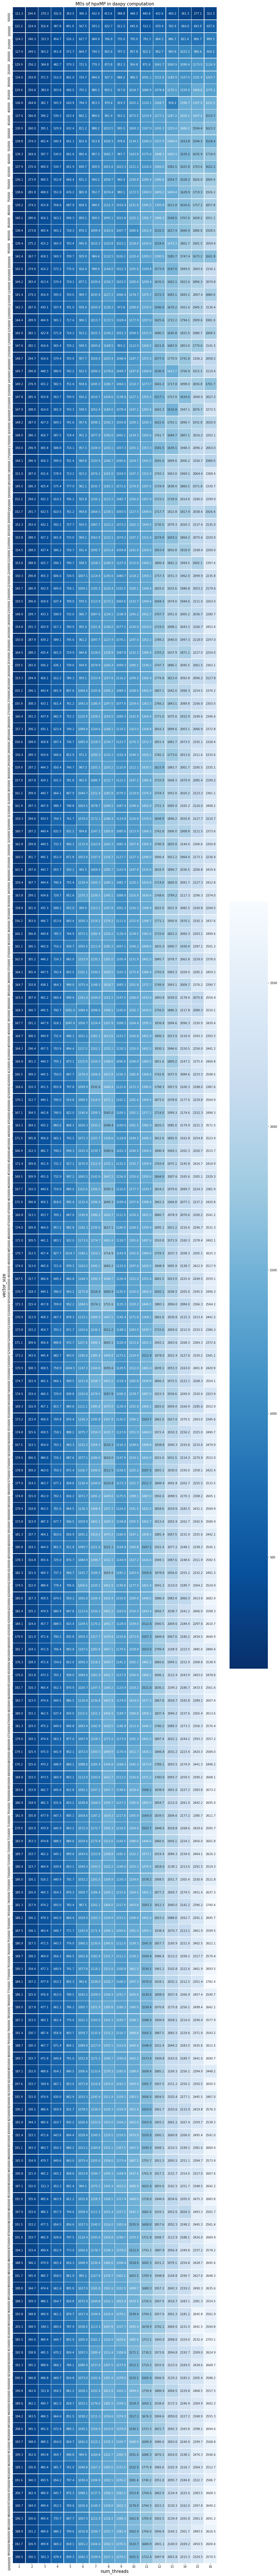

In [17]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in '+bench_name+' computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


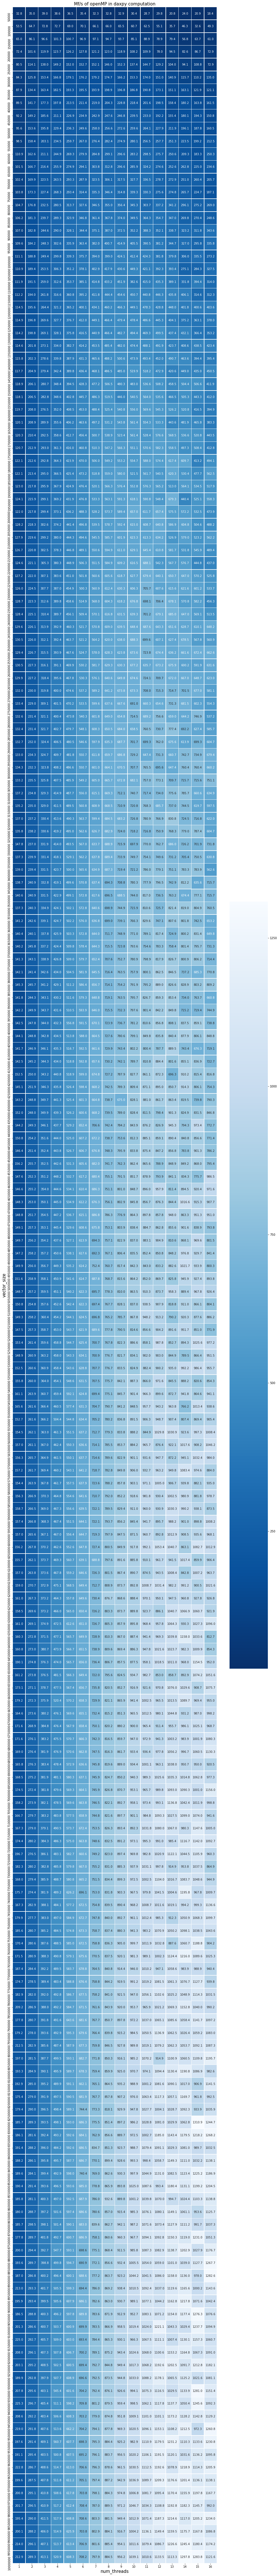

In [18]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in '+bench_name+' computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [19]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [20]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [22]:
pivot_table_diff.head(16)

num_threads        1         2         3         4         5          6   \
vector_size                                                                
50000        3.394558  5.550907  6.929391  8.610724  9.948163  11.185345   
100000       2.285939  3.466688  4.348677  5.335216  7.132864   8.092956   
150000       1.910933  2.859760  3.449965  4.489902  5.226629   6.478584   
200000       1.753422  2.452791  3.027570  3.651234  4.530548   5.200839   
250000       1.613567  2.245379  2.644000  3.234337  3.811558   4.725147   
300000       1.590105  2.064432  2.422035  3.069862  3.356305   4.114019   
350000       1.473372  1.909223  2.344237  2.760011  3.137230   3.862792   
400000       1.519010  1.868903  2.158444  2.557518  2.908024   3.758156   
450000       1.491319  1.788414  2.134687  2.554451  2.747107   3.584862   
500000       1.368643  1.692600  2.018456  2.310546  2.676637   3.250119   
550000       1.408502  1.731924  1.981204  2.306384  2.507090   3.054626   
600000       1.255666  1.657944  1.883947  2.164066  2.457083   2.859160   
650000       1.359278  1.622132  1.848369  2.089718  2.371566   2.851597   
700000       1.329227  1.611691  1.791790  2.097704  2.272207   2.887119   
750000       1.335329  1.626200  1.794109  2.056973  2.305008   2.753850   
800000       1.329099  1.550488  1.788428  1.992360  2.192601   2.528976   

num_threads         7          8          9          10         11         12  \
vector_size                                                                     
50000        13.378014  12.601731  11.804085  14.726455  15.350801  14.536686   
100000        8.977228   9.430507   9.336263  10.629794   8.199524  12.170245   
150000        7.057269   8.096360   7.841785   9.345092   8.907643  10.953102   
200000        6.142125   6.711913   6.702348   7.930356   8.392315  11.446092   
250000        5.123382   5.985952   5.591230   6.948250   6.024338   8.064769   
300000        4.709289   5.308814   5.343149   6.433473   6.270660   7.634921   
350000        4.540108   4.821597   4.663544   5.452362   5.696736   6.233601   
400000        3.896743   4.793064   4.017971   4.694723   5.557661   6.391524   
450000        3.638907   3.883343   3.707720   4.483293   5.213902   6.645426   
500000        3.443200   4.027559   3.651447   4.119421   4.498502   5.464623   
550000        3.306551   3.640761   3.559601   4.048455   4.833541   5.191581   
600000        3.150254   3.563022   3.329725   4.110167   3.938317   5.252428   
650000        3.057904   3.361800   3.449440   3.921846   3.473169   4.973810   
700000        2.919220   3.458000   3.024529   3.652566   3.819663   5.012016   
750000        2.841046   3.101971   3.113458   3.455228   3.951002   5.112323   
800000        2.737473   3.158693   2.834845   3.567622   4.430982   3.872622   

num_threads         13         14         15         16  
vector_size                                              
50000        19.710953  14.238816  13.239772  16.981807  
100000       19.708020  14.332059  19.735098  12.944572  
150000       11.169355  14.457690  12.657679  14.745951  
200000       10.265394  12.515442  11.374879  12.571015  
250000       10.199519  11.666386  10.776520  15.460868  
300000        8.442844   9.571214  10.813444   8.917679  
350000        8.405979   7.113550  11.554421  10.526593  
400000        5.796187   7.763398   8.529157   8.866219  
450000        8.285112   7.886714   7.451291  10.170065  
500000        6.256248   7.566932   8.490466  10.113949  
550000        5.843026   6.952972   8.002627   7.193186  
600000        5.787963   7.306046   8.923061   6.864038  
650000        6.260919   6.185840   7.573029   6.914899  
700000        5.697659   6.486285   7.013519   8.754369  
750000        5.110327   6.129665   7.650608  10.293465  
800000        4.724439   5.458853   6.385824   6.905930

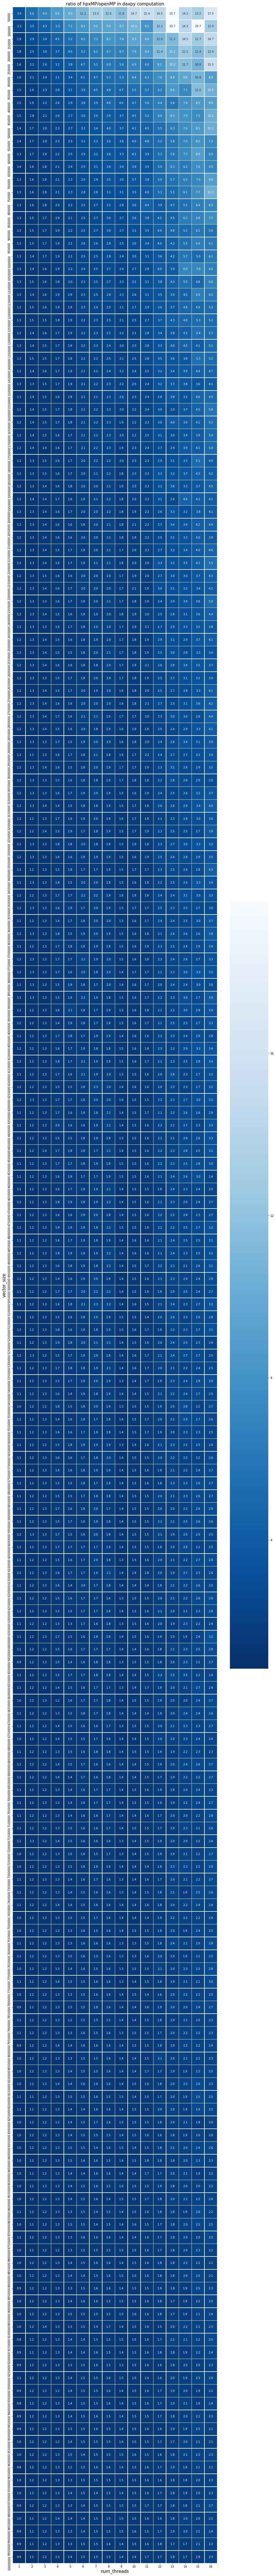

In [23]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in '+bench_name+' computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [24]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")